In [1]:
import pandas as pd

In [2]:
amsterdam=pd.read_json("amsterdam.json")

In [3]:
type(amsterdam)

pandas.core.frame.DataFrame

In [4]:
amsterdam.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,$145.00,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,$88.00,52.370237,4.859507,Entire home/apt,f
2,1.0,2,1.0,1.0,2,2,4,1,$130.00,52.362016,4.866872,Entire home/apt,f
3,2.0,4,1.0,2.0,2,4,2,2,$110.00,52.365826,4.858178,Entire home/apt,f
4,1.0,2,1.0,1.0,1,3,10,1,$115.00,52.364179,4.864885,Entire home/apt,f


In [5]:
# Q1 : Read the data set named, Amsterdam.json
# The number of rows in the raw file is …………

In [6]:
#Answer 1 : 15181

amsterdam.shape[0]

15181

In [7]:
# Q2 : Read the data set named, Amsterdam.json
# Is the column named “Bathroom” in the data?

In [8]:
#Answer 2 : No

amsterdam.columns.tolist()

['host_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'guests_included',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'price',
 'latitude',
 'longitude',
 'room_type',
 'instant_bookable']

In [9]:
# Q3 : Read the data set named, Amsterdam.json
# Column named as “bedrooms” has 12 missing values?

In [10]:
# Answer 3 : Yes

amsterdam.isnull().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

In [11]:
# Q4 : After you have read in the data and done some sanity checks, its time now to dig a little deep and 
# do some feature engineering

# The variable latitude is a numeric variable in the dataframe you just read in

In [12]:
# Answer 4 : Yes

amsterdam.dtypes

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                              object
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
dtype: object

In [13]:
# Q5 : After you have read in the data and done some sanity checks, its time now to dig a little deep and 
# do some feature engineering

# The average value of price column is? (Round your answer to 3 decimal places using round

In [14]:
# Answer 5 : 134.799

amsterdam.price.head()

0    $145.00
1     $88.00
2    $130.00
3    $110.00
4    $115.00
Name: price, dtype: object

In [15]:
amsterdam['price']=amsterdam.price.str.replace('$','')

In [16]:
amsterdam['price']=amsterdam.price.str.replace(',','')

In [17]:
amsterdam['price']=amsterdam.price.astype(float)

In [18]:
avg_price=amsterdam.price.mean()

In [19]:
round(avg_price,3)

134.799

In [20]:
# Q6 : After you have read in the data and done some sanity checks, its time now to dig a little deep and 
# do some feature engineering

# The maximum value in the price column is? (Rounded to 1 decimal place, use round

In [21]:
# Answer 6 : 3142.0

max_price=amsterdam.price.max()

In [22]:
round(max_price,1)

3142.0

In [23]:
# Q7 : After you have read in the data and done some sanity checks, its time now to dig a little deep and 
# do some feature engineering

# What is the 99th percentile in the price column? (Rounded to 1 decimal place, use round

In [24]:
# Answer 7 : 440.0

per_99=amsterdam.price.quantile(0.99)

In [25]:
round(per_99,1)

440.0

In [26]:
# Q8 : After you have read in the data and done some sanity checks, its time now to dig a little deep and do some feature 
# engineering

# Remove all the rows, where values in the price column are more than 440.0. What is the 90th percentile now? 
# (Round your answer to 1 decimal point, use round

In [27]:
# Answer 8 : 210.0

amsterdam.drop(amsterdam[amsterdam['price']>440.0].index,inplace=True)

In [28]:
amsterdam.price.max()

440.0

In [29]:
per_90=amsterdam.price.quantile(0.90)

In [30]:
round(per_90,1)

210.0

In [31]:
# Q9 : After you have read in the data and done some sanity checks, its time now to dig a little deep and do some feature 
# engineering

# Drop all the missing values in the data. How many rows are now left in the data?

In [32]:
# Answer 9 : 14998

amsterdam=amsterdam.dropna(axis=0)

In [33]:
amsterdam.isnull().sum()

host_listings_count               0
accommodates                      0
bathrooms                         0
bedrooms                          0
guests_included                   0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
price                             0
latitude                          0
longitude                         0
room_type                         0
instant_bookable                  0
dtype: int64

In [34]:
amsterdam.shape[0]

14998

In [35]:
# Q10 : One of the key points, that folks at your company want to know is, if prices differ as a function of their distance 
# from city centre.

# Write a function to find the distance of all the observations in your data from the city centre in km units. You can assume 
# that the city centre has a latitude = 52.379189 and longitude = 4.899431. You can find out distances using haversine formula, 
# you can read more about it here https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas 
# (Links to an external site.). Once you have applied the haversine transform, create a new column named “d_centre”, 
# arrange your data by distance in ascending order. The second booking in this sorted list has a price of 
# (round to 1 decimal place)

In [36]:
# Answer 10 : 41.0

amsterdam=pd.get_dummies(amsterdam)

In [37]:
amsterdam.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,1,0,0,1,0
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,1,0,0,1,0
2,1.0,2,1.0,1.0,2,2,4,1,130.0,52.362016,4.866872,1,0,0,1,0
3,2.0,4,1.0,2.0,2,4,2,2,110.0,52.365826,4.858178,1,0,0,1,0
4,1.0,2,1.0,1.0,1,3,10,1,115.0,52.364179,4.864885,1,0,0,1,0


In [38]:
import numpy as np

def haversine_np(lon1,lat1,lon2,lat2):
    lon1,lat1,lon2,lat2=map(np.radians,[lon1,lat1,lon2,lat2])
    
    dlon=lon2-lon1
    dlat=lat2-lat1
    
    a=np.sin(dlat/2.0)**2+np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    c=2*np.arcsin(np.sqrt(a))
    km=6367*c
    
    return km
    
amsterdam['d_centre']=haversine_np(4.899431,52.379189 ,amsterdam['longitude'],amsterdam['latitude'])

In [39]:
amsterdam.sort_values(by='d_centre', ascending=True)

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t,d_centre
3158,1.0,2,1.5,1.0,1,1,0,1,85.0,52.378546,4.900775,0,1,0,1,0,0.115801
3168,1.0,4,1.0,1.0,1,1,0,1,41.0,52.378850,4.901433,0,0,1,1,0,0.140946
2639,1.0,4,1.0,1.0,2,3,27,1,159.0,52.379089,4.897293,1,0,0,1,0,0.145468
3010,4.0,2,1.0,1.0,1,1,4,4,150.0,52.378549,4.896679,0,1,0,0,1,0.199767
1860,1.0,2,1.0,1.0,1,1,9,1,120.0,52.378398,4.896674,0,1,0,1,0,0.206638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,1.0,3,1.0,1.0,2,2,37,1,40.0,52.290687,4.983784,0,1,0,1,0,11.381113
6779,1.0,4,1.0,3.0,1,3,1,1,101.0,52.292209,4.989963,1,0,0,1,0,11.454847
6791,1.0,2,1.0,1.0,1,1,22,1,50.0,52.292890,4.995102,0,1,0,0,1,11.583068
6766,1.0,2,1.0,1.0,1,2,5,1,50.0,52.291664,4.992333,0,1,0,1,0,11.592780


In [40]:
round(41.0,1)

41.0

In [41]:
# Q11 : One of the key points, that folks at your company want to know is,if prices differ as a function of their distance from 
# city centre

# The average price of Private Rooms that are within 1 km from city centre is (Round to 1 decimal place)

In [42]:
# Answer 11 : 118.1

amsterdam1=amsterdam[amsterdam['room_type_Private room']==1]

In [43]:
amsterdam1=amsterdam1[amsterdam1['d_centre']<=1]

In [44]:
avg_price=amsterdam1.price.mean()

In [45]:
round(avg_price,1)

118.1

In [46]:
# Q12 : Now that you have done some initial data exploration and feature engineering,its time now, to build a regression model. 
# Before you start building a regression model, you will need to prepare your data.

# Create a predictor matrix X, after creating dummies for categorical data. How many columns X will have?

In [47]:
amsterdam.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t,d_centre
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,1,0,0,1,0,2.987199
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,1,0,0,1,0,2.885443
2,1.0,2,1.0,1.0,2,2,4,1,130.0,52.362016,4.866872,1,0,0,1,0,2.919191
3,2.0,4,1.0,2.0,2,4,2,2,110.0,52.365826,4.858178,1,0,0,1,0,3.168346
4,1.0,2,1.0,1.0,1,3,10,1,115.0,52.364179,4.864885,1,0,0,1,0,2.876726


In [48]:
# Answer 12 : 16

#Predictor Matrix
X=amsterdam.drop('price',axis=1)
X.shape

(14998, 16)

In [49]:
y=amsterdam['price']

In [50]:
# Q13 : Now that you have done some initial data exploration and feature engineering,its time now, to build a regression model. 
# Before you start building a regression model, you will need to prepare your data.

# Partition your data into train and test sets, Use a random_state=200.(sklearn.model_selection.train_test_split()) to split 
# your data into 70% train set and 30% test set. How many records will be there in train and test set?

# Rows in train   ...........
# Rows in test    ...........

In [51]:
# Answer 13 :

#Rows in train 10498
#Rows in test   4500

import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.30,random_state=200)

In [52]:
X_train.shape[0]

10498

In [53]:
X_test.shape[0]

4500

In [54]:
# Q14 : Now create an ensemble regressor model, use a RandomForestRegressor, to build and finalize a model. 
# Do a grid search on n_estimators, with a grid of [30,40,50,60,70,………………600]. Keep a random_state of 200 
# (for reproducibility of results). Use OOB to tune. Keep max_features=”sqrt”

# The three most informative factors, determining price are:
# (Hint: OOB score measures, R^2 , higher the oob score (in regression setting), better is the model)

In [62]:
# Answer 14 :  accommodates, bedrooms, d_centre

from sklearn.ensemble import RandomForestRegressor
for i in range(30,601,10):
    reg=RandomForestRegressor(n_estimators=i,max_features="sqrt",oob_score=True,random_state=200)
    reg.fit(X_train,y_train)
    oob=reg.oob_score_
    print("For n_estimators="+str(i))
    print("OOB Score is "+str(oob))
    print("*****************************************************")

For n_estimators=30
OOB Score is 0.5379078866664242
*****************************************************
For n_estimators=40
OOB Score is 0.5478802608384239
*****************************************************
For n_estimators=50
OOB Score is 0.5530474444114948
*****************************************************
For n_estimators=60
OOB Score is 0.5579335875987974
*****************************************************
For n_estimators=70
OOB Score is 0.5603034710522897
*****************************************************
For n_estimators=80
OOB Score is 0.5635906070801552
*****************************************************
For n_estimators=90
OOB Score is 0.566877726483203
*****************************************************
For n_estimators=100
OOB Score is 0.5673897548008631
*****************************************************
For n_estimators=110
OOB Score is 0.5683122791083096
*****************************************************
For n_estimators=120
OOB Score is 0.569124983

In [56]:
#Finalize model with n_estimators=490
reg=RandomForestRegressor(n_estimators=490,oob_score=True,max_features="sqrt",random_state=200)
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=490,
                      n_jobs=None, oob_score=True, random_state=200, verbose=0,
                      warm_start=False)

In [57]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False)

accommodates                      0.182138
bedrooms                          0.127020
d_centre                          0.126390
longitude                         0.113861
latitude                          0.107859
number_of_reviews                 0.061218
guests_included                   0.059434
bathrooms                         0.050925
room_type_Entire home/apt         0.039980
minimum_nights                    0.035135
room_type_Private room            0.033590
calculated_host_listings_count    0.025790
host_listings_count               0.022767
instant_bookable_f                0.006478
instant_bookable_t                0.006417
room_type_Shared room             0.000999
dtype: float64

In [58]:
# Q15 : To find out how good our model is in accurately predicting the price, we will asses its performance out of sample, 
# on our test dataset.

# Create a scatter between, actual price and error. Based on this scatter, will you be more confident about predictions where 
# actual price is less than 200?(Hint: Look at the variability in predictions across the price range)

In [59]:
# Answer 15 : True

reg.predict(X_test)

array([151.24897959, 175.73673469, 126.4       , ...,  58.4877551 ,
       121.12244898, 122.30204082])

In [60]:
import matplotlib.pyplot as plt

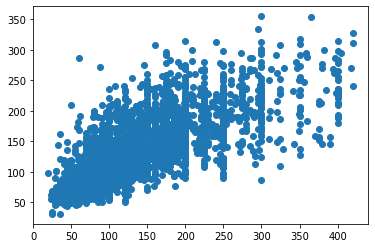

In [61]:
plt.scatter(y_test,reg.predict(X_test))